<p style="background-color:#1DA1F2;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>NLP Application with ML - Classification of Tweets Data</b></p>

<div style="text-align: center;">
    <img src="https://www.twenvy.com/wp-content/uploads/2022/08/Twitter-Logo-Meaning-1024x369.jpg" width="750" height="350"/>
</div>

# <font color='#1DA1F2'> <b>Importing Libraries</b><font color='black'> 

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)

# <font color='#1DA1F2'> <b>Loading The Dataset</b><font color='black'>  

[Kaggle Dataset Link](https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv)

In [88]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# <font color='#1DA1F2'> <b>Understanding The Data & EDA</b><font color='black'> 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

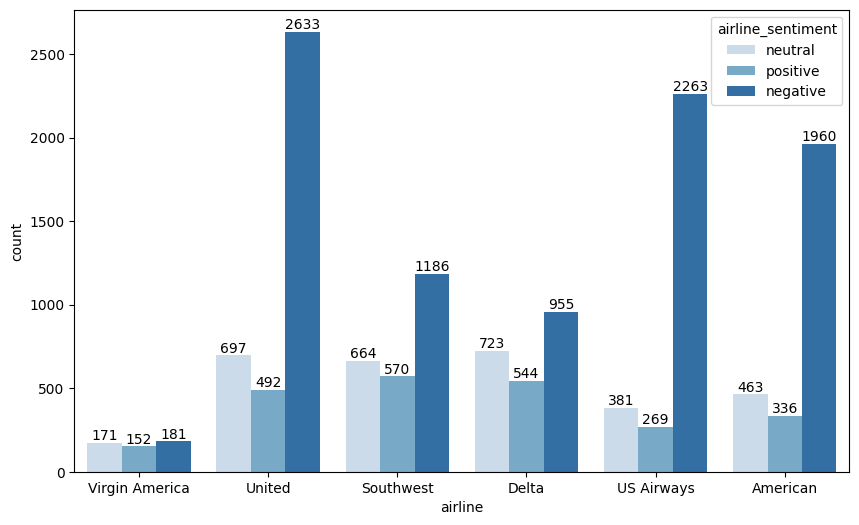

In [91]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment", palette= "Blues")
for p in ax.containers:
    ax.bar_label(p)

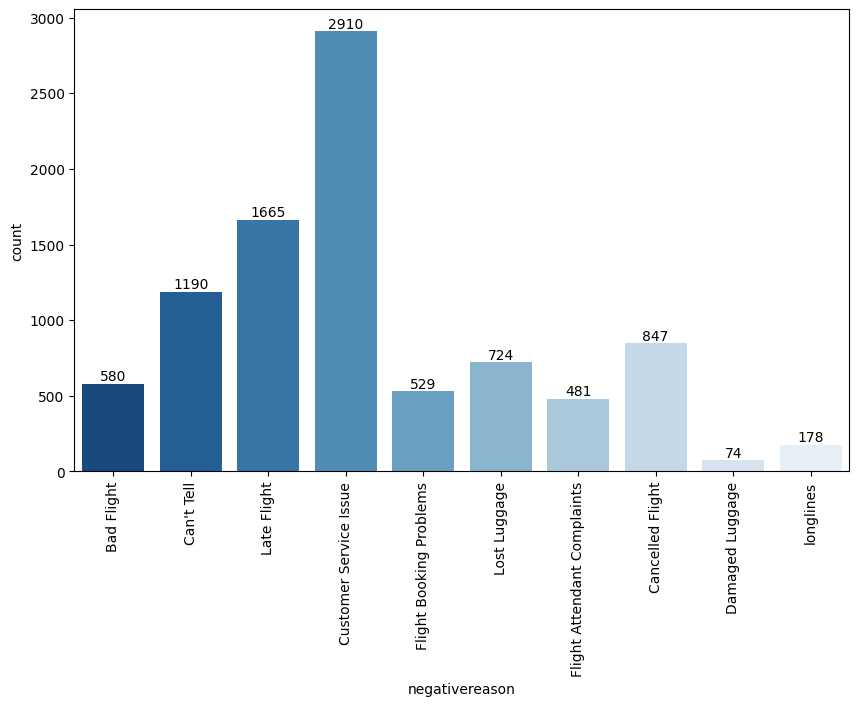

In [92]:
ax = sns.countplot(data =df, x ="negativereason", palette= "Blues_r")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

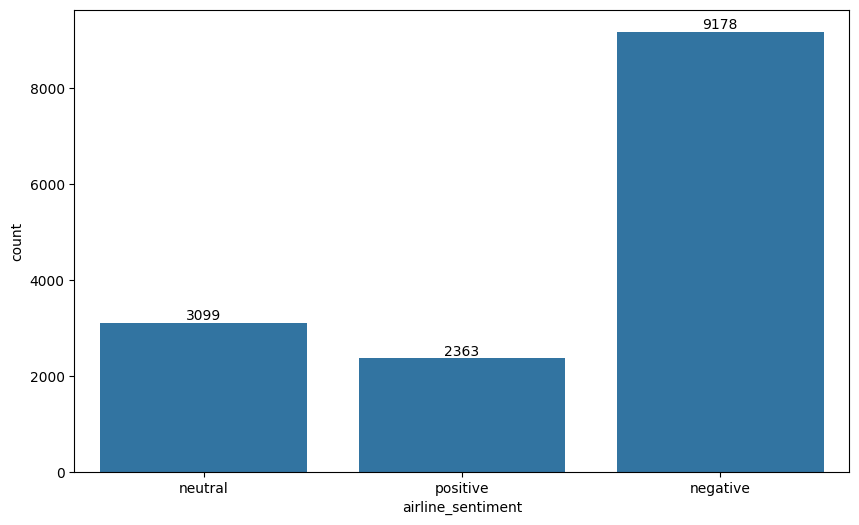

In [93]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

In [94]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## <font color='skyblue'> <b>Cleaning Data</b><font color='black'> 

In [96]:
df2 = df.copy()

In [97]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

The **"re"** module in Python is used for performing **regular expression** operations. The "re" module allows searching for specific patterns in text, replacing matched patterns, and performing text manipulations based on patterns.

Regular expressions are character sequences that define patterns within text, allowing users to find or modify specific parts of a string. For example, extracting all email addresses from a text or replacing a specific pattern can be achieved using the "re" module.

The "re" module includes functions such as **`re.sub()`**, which is used for finding and replacing pattern matches. Additionally, functions like **`re.search()`**, **`re.match()`**, and **`re.findall()`** can be used to search for and retrieve matched patterns.

Regular expressions use **special characters** and **tokens** to define patterns within text. For example:
- `\d` represents digit characters.
- `\w` represents word characters.

Using these special characters and tokens, more complex patterns can be defined.

The "re" module is widely used in **text processing, text analysis, data cleaning, and validation**. Understanding and using regular expressions provides a powerful tool for working with text efficiently.

In [99]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"

# Remove everything starting with "http" followed by non-whitespace characters and replace it with an empty string ("")
s = re.sub("http\S+", "", s).strip()       

# Strip leading and trailing whitespace
s

'#lateflight @airlines'

**Remove URLs from Text Using `re.sub` with Regular Expressions**

```python
s = re.sub("http\S+", "", s).strip()  
# Replace any substring starting with "http" followed by non-whitespace characters with an empty string ("")

s = s.strip()  
# Remove leading and trailing spaces from the text

In [101]:
s = re.sub("#\S+", "", s)                   # Clears expression starting with "#"
s

' @airlines'

In [102]:
s = re.sub("@\S+", "", s)                   # Clears expression starting with "@"
s.strip()

''

In [175]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\refia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [165]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\refia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [167]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\refia\AppData\Roaming\nltk_data...


True

In [169]:
stop_words = stopwords.words('english')

# In sentiment analysis, "not" and "no" should be kept in the data.
# Removing these two words from the stop words list.
for i in ["not", "no"]:            
        stop_words.remove(i)

In [171]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [177]:
cleaning_text = df2["text"].apply(cleaning)       # Applying the cleaning function to the entire text with apply
cleaning_text.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

# <font color='#1DA1F2'> <b>Modeling</b><font color='black'> 

## <font color='skyblue'> <b>Features and Label</b><font color='black'> 

In [179]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## <font color='skyblue'> <b>Train | Test Split</b><font color='black'> 

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = df2["text"]
y= df2["airline_sentiment"]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## <font color='skyblue'> <b>Vectorization</b><font color='black'> 

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # min_df= 3 (Ignore those with 3 or less in Corpus)
X_train_count = vectorizer.fit_transform(X_train)         
X_test_count = vectorizer.transform(X_test)          

In [187]:
# The data was cleaned by calling the cleaning function thanks to "preprocessor=cleaning".

In [188]:
X_train_count

<11712x3126 sparse matrix of type '<class 'numpy.int64'>'
	with 91730 stored elements in Compressed Sparse Row format>

In [189]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [190]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,account,accountability,acct,accurate,acknowledge,across,act,action,active,actual,actually,ad,add,added,adding,addition,additional,address,addressed,addtl,admiral,admit,adopting,advance,advantage,advertise,advertising,advice,advise,advised,advisory,affect,affected,afford,affordable,afternoon,age,agency,agent,aggressive,ago,agree,agt,ah,ahead,ahhhh,ahold,air,airbus,aircraft,airfare,airline,airplane,airport,airway,aisle,aka,al,alaska,albuquerque,alert,ali,allergy,alliance,allow,allowed,allowing,allows,almost,alone,along,alot,already,alright,also,alternate,alternative,although,altitude,always,amazed,amazing,america,american,amex,among,amount,amp,andrew,angry,anniversary,announce,announced,announcement,announces,annoyed,annoying,annual,another,answer,answered,answering,anthony,anticipate,anxious,anymore,anyone,anything,anytime,anyway,anywhere,apart,apologize,apologizes,apology,app,appalled,apparently,appear,appears,appease,apple,application,applied,apply,appointment,appreciate,appreciated,approach,appropriate,approve,approved,apps,april,area,arent,argued,arizona,armrest,around,arrange,arranged,arrangement,arrival,arrive,arrived,arrives,arriving,article,aruba,as,asap,ase,ashamed,ask,asked,asking,asleep,aspen,assaulted,asset,assign,assigned,assignment,assist,assistance,assisting,assult,assume,assuming,atc,athlete,atl,atlanta,atlantic,atrocious,attempt,attempted,attempting,attend,attendant,attention,attitude,atx,au,august,auh,austin,australia,auto,automated,automatically,avail,availability,available,average,aviation,aviv,avoid,aw,awaiting,awake,award,aware,away,awesome,awful,aww,ba,baby,back,backup,bad,badge,badly,bae,bag,bagage,baggage,bahamas,balance,ball,baltimore,band,bank,...,tucson,tue,tues,tuesday,turbulence,turn,turnaround,turned,turning,tv,tweet,tweeted,tweeting,twelve,twice,twitter,two,tx,ty,type,typical,typo,ua,ual,ugh,uh,uk,um,umm,unable,unacceptable,unavailable,unbelievable,uncomfortable,understaffed,understaffing,understand,understandable,understanding,understands,understatement,understood,unexpected,unfortunate,unfortunately,unfriendly,unhappy,unhelpful,united,uniteds,unknown,unless,unlike,unnecessary,unpleasant,unprofessional,unreal,unreliable,unused,unwilling,upcoming,update,updated,updating,upgrade,upgraded,upon,ups,upset,ur,urgent,urgently,usa,usair,usairways,use,used,useful,useless,user,username,using,usual,usually,utah,utterly,uvf,vacation,valentine,valid,vallarta,valuable,value,van,various,vega,version,via,vice,video,vieques,view,virgin,visa,visit,vital,voice,volume,volunteer,vomit,voucher,vx,wait,waited,waiting,waive,waiver,wake,walk,walked,walking,wall,wallet,wan,want,wanted,wanting,warm,warmth,warning,washington,wasnt,waste,wasted,wasting,watch,watched,watching,water,waterbury,way,weak,wearing,weather,web,website,wed,wedding,wednesday,week,weekend,weight,weird,welcome,well,went,werent,west,westchester,wet,weve,whatever,whats,wheel,wheelchair,whenever,wheres,whether,white,who,whoever,whole,whose,wichita,wife,wifi,willing,win,wind,window,wine,wing,winner,winning,winter,wish,within,without,wknd,woke,woman,wonder,wonderful,wondering,wont,woo,word,work,worked,worker,working,world,worried,worry,worse,worst,worth,worthless,would,wouldnt,wouldve,wow,wrap,wreck,write,writing,written,wrong,wrote,wtf,wth,xna,ya,yall,yay,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### <font color='#1DA1F2'> <b>Model Comparisons - Vectorization</b><font color='black'> 

In [192]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [193]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [194]:
y_train

12713    negative
9305     positive
9726     negative
4751     negative
14102    negative
           ...   
6570     negative
880       neutral
10563    negative
3924      neutral
11333    negative
Name: airline_sentiment, Length: 11712, dtype: object

In [195]:
y_train.unique()

array(['negative', 'positive', 'neutral'], dtype=object)

#### <font color='skyblue'> <b>Naive Bayes</b><font color='black'> 

In [197]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [198]:
nb = MultinomialNB(alpha=3)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=3)

In [199]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1705   86   44]
 [ 336  239   45]
 [ 138   35  300]]
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1835
     neutral       0.66      0.39      0.49       620
    positive       0.77      0.63      0.70       473

    accuracy                           0.77      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.76      0.77      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      7343
     neutral       0.76      0.49      0.59      2479
    positive       0.81      0.68      0.74      1890

    accuracy                           0.80     11712
   macro avg       0.79      0.70      0.73     11712
weighted avg       0.80      0.80      0.79     11712



In [200]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.754439
test_precision-neg    0.775536
test_recall-neg       0.923326
test_f1-neg           0.842967
dtype: float64

In [ ]:
# !pip install yellowbrick

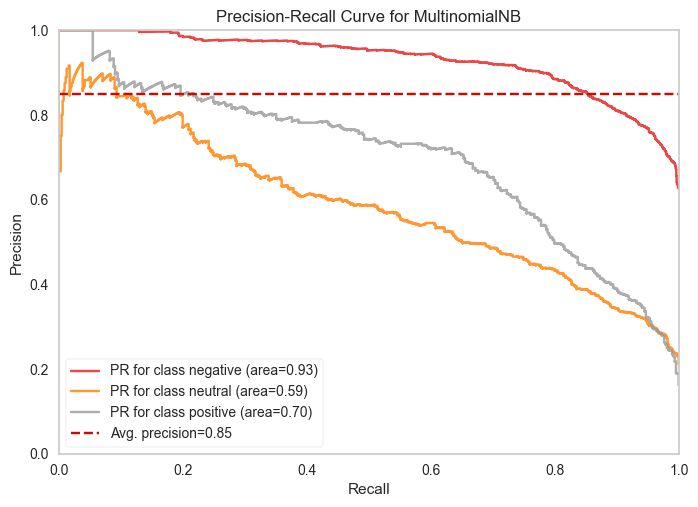

In [202]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

**Importance of Precision and Recall in Imbalanced Datasets**

Precision and recall are crucial for understanding model performance, especially in imbalanced datasets.

From this graph, we can see the impact of different classes on the model separately (also reflecting the effect of unbalanced distribution).

- **Precision** measures the proportion of correctly predicted positive instances among all predicted positives.  
- **Recall** (also known as sensitivity) measures the proportion of actual positive instances that were correctly predicted.

There is a **trade-off** between precision and recall.

The **Precision-Recall (PR) curve** is used to visualize this trade-off. This curve shows the precision and recall values at different threshold levels.  
Optimal performance is typically achieved by selecting a threshold that balances sufficiently high precision and recall values.

In [204]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

Record the model performance above so that you can compare all the models at the end.

#### <font color='skyblue'> <b>Logistic Regression</b><font color='black'> 

In [207]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [208]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1759   40   36]
 [ 366  211   43]
 [ 176   48  249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.71      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.74      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.40      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [209]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.745561
test_precision-neg    0.747386
test_recall-neg       0.963501
test_f1-neg           0.841775
dtype: float64

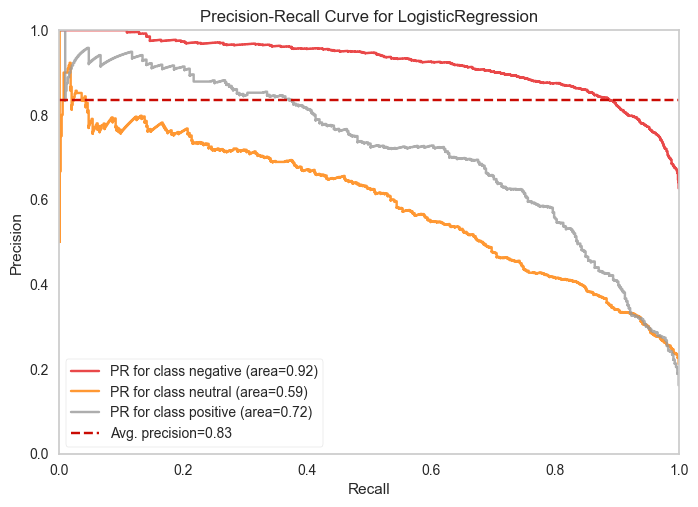

In [210]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [211]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [212]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [213]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1303  434   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.71      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



#### <font color='skyblue'> <b>SVM (SVC)</b><font color='black'> 

In [215]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [216]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1711   80   44]
 [ 291  279   50]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [217]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.777494
test_precision-neg    0.799702
test_recall-neg       0.939396
test_f1-neg           0.863922
dtype: float64

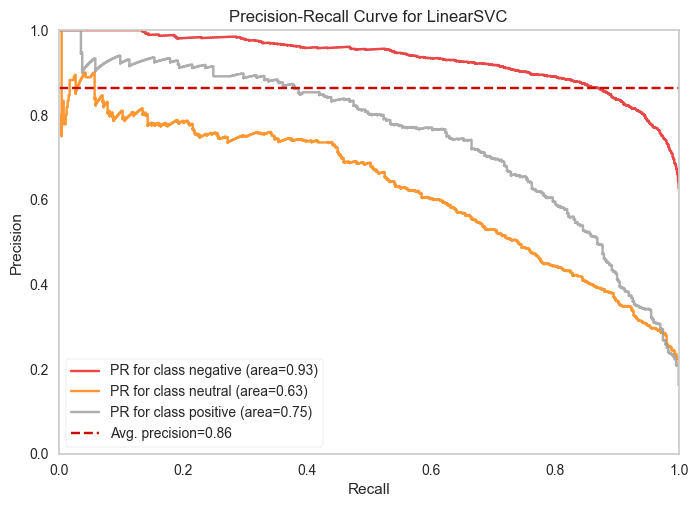

In [218]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [219]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

#### <font color='skyblue'> <b>Random Forest</b><font color='black'> 

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [222]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1798   11   26]
 [ 523   59   38]
 [ 219    7  247]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.77      0.10      0.17       620
    positive       0.79      0.52      0.63       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.20      0.34      2479
    positive       0.92      0.63      0.75      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.64     11712
weighted avg       0.82      0.77      0.72     11712



In [223]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.710040
test_precision-neg    0.698911
test_recall-neg       0.984338
test_f1-neg           0.817418
dtype: float64

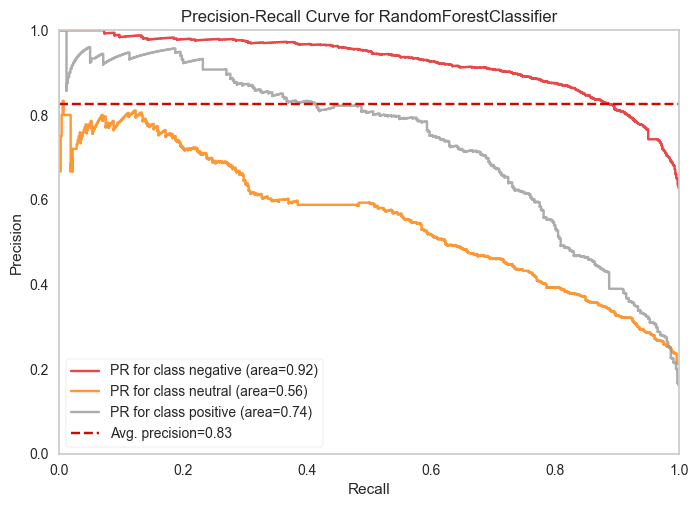

In [224]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [225]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

In [226]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [227]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1455  305   75]
 [ 152  403   65]
 [  53   97  323]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      1835
     neutral       0.50      0.65      0.57       620
    positive       0.70      0.68      0.69       473

    accuracy                           0.74      2928
   macro avg       0.69      0.71      0.70      2928
weighted avg       0.77      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.97      0.85      0.91      7343
     neutral       0.64      0.90      0.75      2479
    positive       0.87      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.86      0.86     11712



#### <font color='skyblue'> <b>Ada Boost</b><font color='black'> 

In [229]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [230]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1798    0   37]
 [ 570    4   46]
 [ 241   11  221]]
Test_Set
              precision    recall  f1-score   support

    negative       0.69      0.98      0.81      1835
     neutral       0.27      0.01      0.01       620
    positive       0.73      0.47      0.57       473

    accuracy                           0.69      2928
   macro avg       0.56      0.48      0.46      2928
weighted avg       0.61      0.69      0.60      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.68      0.98      0.80      7343
     neutral       0.30      0.01      0.02      2479
    positive       0.72      0.44      0.55      1890

    accuracy                           0.69     11712
   macro avg       0.57      0.48      0.46     11712
weighted avg       0.61      0.69      0.60     11712



In [231]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.685537
test_precision-neg    0.683839
test_recall-neg       0.974532
test_f1-neg           0.803686
dtype: float64

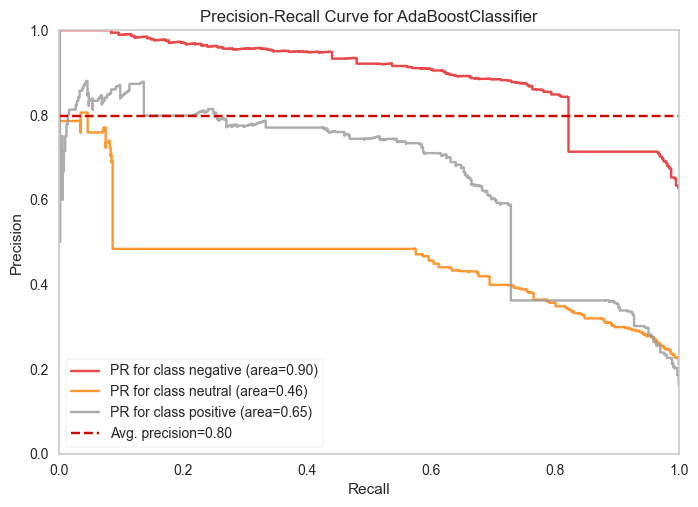

In [232]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [233]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = viz.score_["negative"]

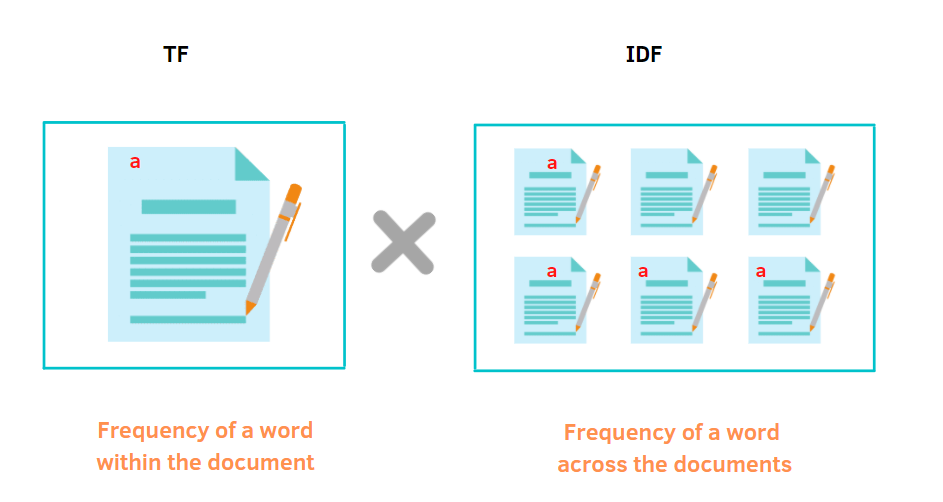

## <font color='skyblue'> <b>TF-IDF</b><font color='black'> 

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [238]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [239]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,account,accountability,acct,accurate,acknowledge,across,act,action,active,actual,actually,ad,add,added,adding,addition,additional,address,addressed,addtl,admiral,admit,adopting,advance,advantage,advertise,advertising,advice,advise,advised,advisory,affect,affected,afford,affordable,afternoon,age,agency,agent,aggressive,ago,agree,agt,ah,ahead,ahhhh,ahold,air,airbus,aircraft,airfare,airline,airplane,airport,airway,aisle,aka,al,alaska,albuquerque,alert,ali,allergy,alliance,allow,allowed,allowing,allows,almost,alone,along,alot,already,alright,also,alternate,alternative,although,altitude,always,amazed,amazing,america,american,amex,among,amount,amp,andrew,angry,anniversary,announce,announced,announcement,announces,annoyed,annoying,annual,another,answer,answered,answering,anthony,anticipate,anxious,anymore,anyone,anything,anytime,anyway,anywhere,apart,apologize,apologizes,apology,app,appalled,apparently,appear,appears,appease,apple,application,applied,apply,appointment,appreciate,appreciated,approach,appropriate,approve,approved,apps,april,area,arent,argued,arizona,armrest,around,arrange,arranged,arrangement,arrival,arrive,arrived,arrives,arriving,article,aruba,as,asap,ase,ashamed,ask,asked,asking,asleep,aspen,assaulted,asset,assign,assigned,assignment,assist,assistance,assisting,assult,assume,assuming,atc,athlete,atl,atlanta,atlantic,atrocious,attempt,attempted,attempting,attend,attendant,attention,attitude,atx,au,august,auh,austin,australia,auto,automated,automatically,avail,availability,available,average,aviation,aviv,avoid,aw,awaiting,awake,award,aware,away,awesome,awful,aww,ba,baby,back,backup,bad,badge,badly,bae,bag,bagage,baggage,bahamas,balance,ball,baltimore,band,bank,...,tucson,tue,tues,tuesday,turbulence,turn,turnaround,turned,turning,tv,tweet,tweeted,tweeting,twelve,twice,twitter,two,tx,ty,type,typical,typo,ua,ual,ugh,uh,uk,um,umm,unable,unacceptable,unavailable,unbelievable,uncomfortable,understaffed,understaffing,understand,understandable,understanding,understands,understatement,understood,unexpected,unfortunate,unfortunately,unfriendly,unhappy,unhelpful,united,uniteds,unknown,unless,unlike,unnecessary,unpleasant,unprofessional,unreal,unreliable,unused,unwilling,upcoming,update,updated,updating,upgrade,upgraded,upon,ups,upset,ur,urgent,urgently,usa,usair,usairways,use,used,useful,useless,user,username,using,usual,usually,utah,utterly,uvf,vacation,valentine,valid,vallarta,valuable,value,van,various,vega,version,via,vice,video,vieques,view,virgin,visa,visit,vital,voice,volume,volunteer,vomit,voucher,vx,wait,waited,waiting,waive,waiver,wake,walk,walked,walking,wall,wallet,wan,want,wanted,wanting,warm,warmth,warning,washington,wasnt,waste,wasted,wasting,watch,watched,watching,water,waterbury,way,weak,wearing,weather,web,website,wed,wedding,wednesday,week,weekend,weight,weird,welcome,well,went,werent,west,westchester,wet,weve,whatever,whats,wheel,wheelchair,whenever,wheres,whether,white,who,whoever,whole,whose,wichita,wife,wifi,willing,win,wind,window,wine,wing,winner,winning,winter,wish,within,without,wknd,woke,woman,wonder,wonderful,wondering,wont,woo,word,work,worked,worker,working,world,worried,worry,worse,worst,worth,worthless,would,wouldnt,wouldve,wow,wrap,wreck,write,writing,written,wrong,wrote,wtf,wth,xna,ya,yall,yay,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### <font color='#1DA1F2'> <b>Model Comparisons  TF-IDF</b><font color='black'> 

#### <font color='skyblue'> <b>Naive Bayes</b><font color='black'> 

In [242]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [243]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1802   25    8]
 [ 426  172   22]
 [ 248   31  194]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1835
     neutral       0.75      0.28      0.41       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.74      2928
   macro avg       0.78      0.56      0.60      2928
weighted avg       0.76      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7343
     neutral       0.84      0.35      0.50      2479
    positive       0.91      0.51      0.65      1890

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



In [244]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.731643
test_precision-neg    0.721593
test_recall-neg       0.978890
test_f1-neg           0.830756
dtype: float64

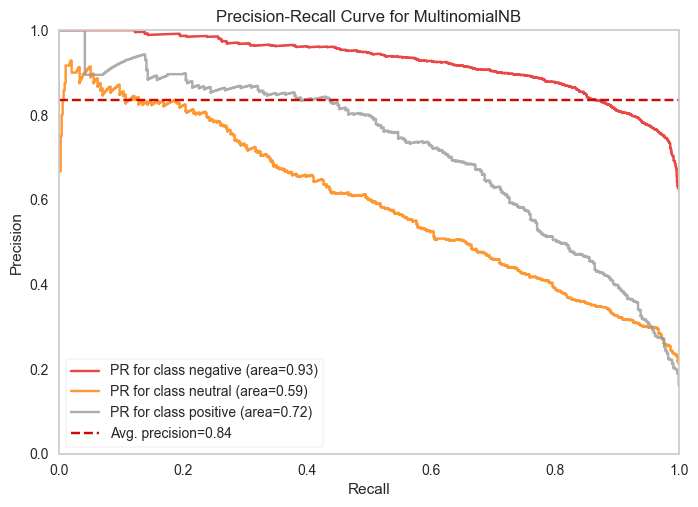

In [245]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [246]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = viz.score_["negative"]

#### <font color='skyblue'> <b>Logistic Regression</b><font color='black'> 

In [248]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [249]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 331  258   31]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.42      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.70      2928
weighted avg       0.78      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.81      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [250]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.771688
test_precision-neg    0.776219
test_recall-neg       0.960506
test_f1-neg           0.858567
dtype: float64

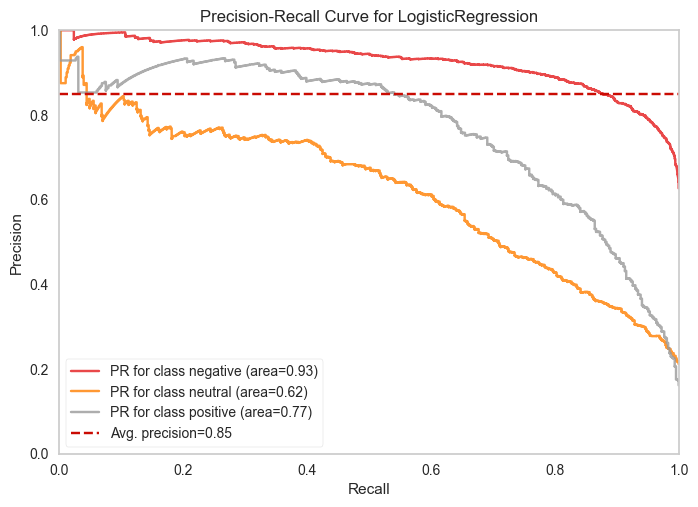

In [251]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [252]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = viz.score_["negative"]

In [253]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [254]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1429  307   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.83      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.74      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



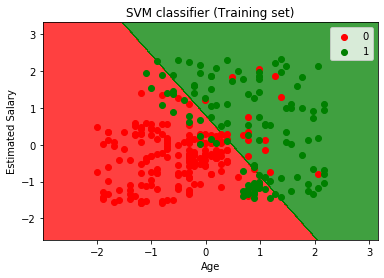

#### <font color='skyblue'> <b>SVM (SVC)</b><font color='black'> 

In [257]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [258]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1737   64   34]
 [ 312  263   45]
 [ 124   44  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.64      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [259]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.781934
test_precision-neg    0.790352
test_recall-neg       0.956965
test_f1-neg           0.865677
dtype: float64

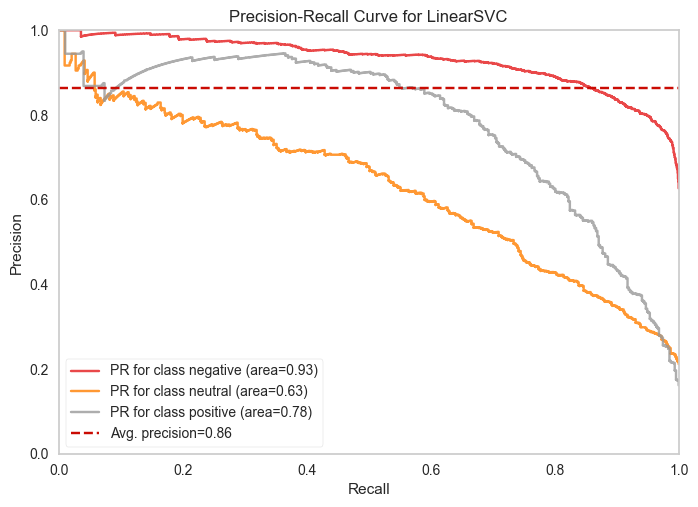

In [260]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [261]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = viz.score_["negative"]

#### <font color='skyblue'> <b>Random Forest</b><font color='black'> 

In [263]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [264]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1805   10   20]
 [ 532   53   35]
 [ 242    7  224]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.09      0.15       620
    positive       0.80      0.47      0.60       473

    accuracy                           0.71      2928
   macro avg       0.75      0.51      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.21      0.34      2479
    positive       0.94      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.60      0.64     11712
weighted avg       0.82      0.76      0.72     11712



In [265]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.707565
test_precision-neg    0.694344
test_recall-neg       0.988288
test_f1-neg           0.815631
dtype: float64

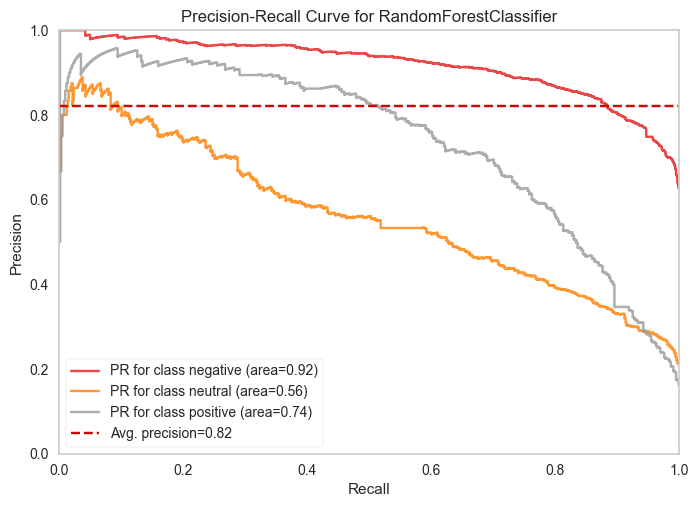

In [266]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [267]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [268]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [269]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1353  386   96]
 [ 129  423   68]
 [  47  108  318]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80      1835
     neutral       0.46      0.68      0.55       620
    positive       0.66      0.67      0.67       473

    accuracy                           0.72      2928
   macro avg       0.67      0.70      0.67      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      7343
     neutral       0.52      0.81      0.63      2479
    positive       0.74      0.72      0.73      1890

    accuracy                           0.77     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.77      0.78     11712



#### <font color='skyblue'> <b>Ada Boost</b><font color='black'> 

In [271]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [272]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1795    5   35]
 [ 549   27   44]
 [ 252    0  221]]
Test_Set
              precision    recall  f1-score   support

    negative       0.69      0.98      0.81      1835
     neutral       0.84      0.04      0.08       620
    positive       0.74      0.47      0.57       473

    accuracy                           0.70      2928
   macro avg       0.76      0.50      0.49      2928
weighted avg       0.73      0.70      0.62      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.69      0.98      0.81      7343
     neutral       0.85      0.05      0.09      2479
    positive       0.77      0.44      0.56      1890

    accuracy                           0.70     11712
   macro avg       0.77      0.49      0.49     11712
weighted avg       0.74      0.70      0.62     11712



In [273]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.688183
test_precision-neg    0.681841
test_recall-neg       0.981478
test_f1-neg           0.804667
dtype: float64

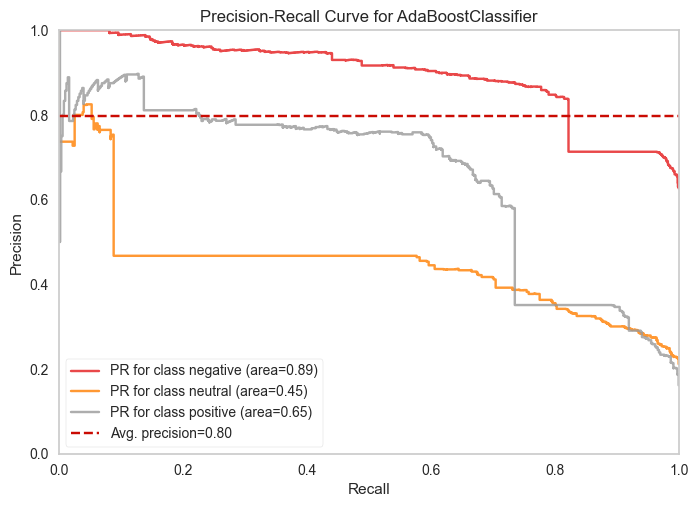

In [274]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [275]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = viz.score_["negative"]

# <font color='#1DA1F2'> <b>Comparing Models' Scores</b><font color='black'> 

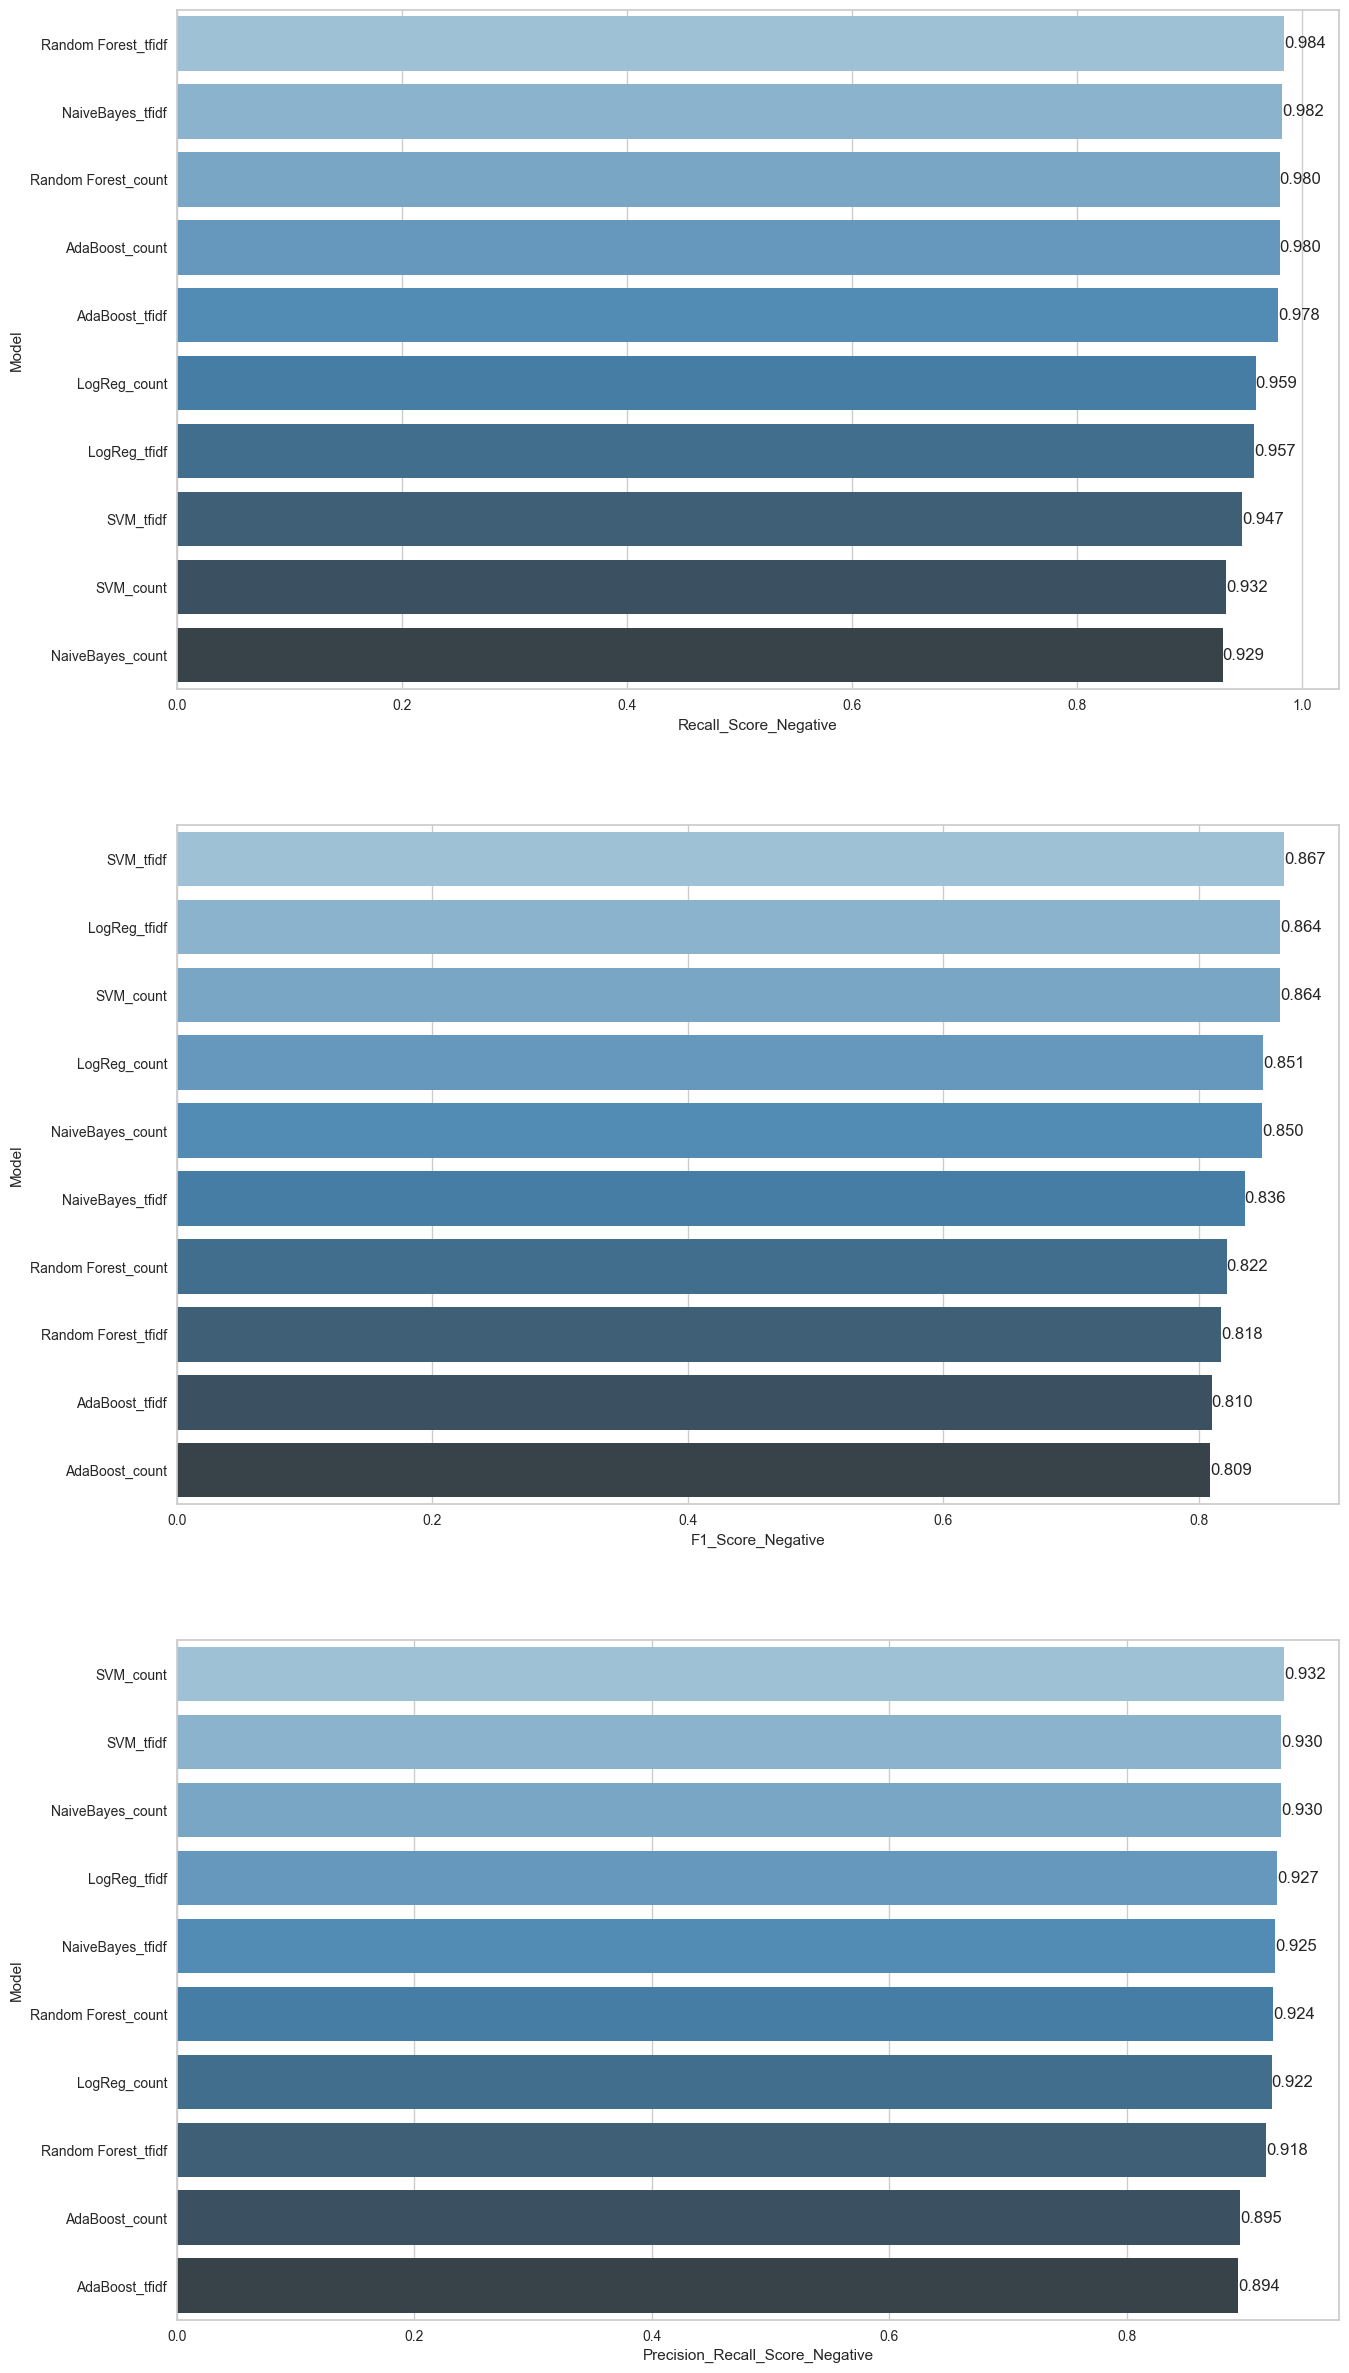

In [277]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",  
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], 
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                   rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg,  rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                            rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

# <font color='#1DA1F2'> <b>For New Tweets - Prediction with Pipeline</b><font color='black'> 

In [279]:
from sklearn.pipeline import Pipeline

**Text Processing and Classification Pipeline with Scikit-Learn**

This code creates a data processing and classification pipeline using the **scikit-learn** library.  
Pipelines are commonly used in text mining and text classification applications.  
A pipeline integrates data processing and modeling steps, making it easily reusable.

This specific **Pipeline** consists of two main steps:

- **TfidfVectorizer**: Converts text documents into **TF-IDF (Term Frequency-Inverse Document Frequency)** vectors.  
  - `preprocessor=cleaning` applies preprocessing to the text data.  
  - `min_df=3` ensures that only terms appearing in at least 3 documents are considered.

- **LogisticRegression**: Uses **logistic regression** as the classification model.  
  - `C=0.4` sets the regularization parameter.  
  - `max_iter=1000` limits the maximum number of iterations.

This pipeline efficiently combines preprocessing and classification for text-based machine learning tasks.

In [281]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),('log',LogisticRegression(C=0.4, max_iter=1000))])

**Data Processing and Modeling Pipeline Using `Pipeline` Class**

This code creates a data processing and modeling pipeline using the **Pipeline** class.  
A **Pipeline** consists of a series of steps, where each step sequentially transforms the data or applies it to a model.

This specific pipeline consists of **two steps**:

- **TfidfVectorizer**: A feature extraction step that converts text data into numerical vectors.  
  - The `TfidfVectorizer` class transforms texts into **TF-IDF (Term Frequency-Inverse Document Frequency)** values.  
  - The `preprocessor=cleaning` parameter specifies a preprocessing function named `cleaning` for text data.  
  - The `min_df=3` parameter ensures that only terms appearing in at least **3 documents** are used.

- **LogisticRegression**: Represents the classification model.  
  - A **logistic regression** model is created using the `LogisticRegression` class.  
  - The `C=0.4` parameter sets the **regularization parameter** for logistic regression.  
  - The `max_iter=1000` parameter specifies the **maximum number of iterations**.

This pipeline first transforms text data into **TF-IDF values**, then trains a **logistic regression** model using these values.

**Understanding `max_iter=1000`**

- `max_iter=1000` specifies the **maximum number of iterations** for the logistic regression model.  
- Iterations refer to repeated update steps where the model learns from the training data.  
- The training process stops when the model reaches the **maximum iteration count** or meets the **convergence criteria**.

This parameter **controls the training duration** of the model.  
For **large datasets** or **complex models**, more iterations may be required.  
The `max_iter` value can be adjusted to extend or shorten the training duration.  
Setting `max_iter=1000` ensures that training stops after **1000 iterations**.

In [283]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x0000023D1DA21580>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

**Fitting the Pipeline to Data**

This code uses the **pipeline (`pipe`)** to fit the model to the data.  
The **fit** process runs each step in the pipeline sequentially, transforming the data and applying it to the model.

- **`X` dataset** represents the training data.  
  - This data should contain **feature vectors of the text samples**.  
  - As mentioned in the previous step, the `TfidfVectorizer` step transforms texts into **TF-IDF values**.

- **`y` dataset** contains the corresponding labels.  
  - In a classification problem, this dataset should include the **correct class labels** for the text samples.

This code fits the pipeline to the training data.  
- First, the **TfidfVectorizer** step converts text data into **numerical feature vectors**.  
- Then, the **LogisticRegression** step trains the **logistic regression model** using these vectors.  

As a result, the model learns from the **text features and labels**, creating a classification model.

In [285]:
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [286]:
tweet = "didn't enjoy flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [287]:
tweet = "it is amazing"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [288]:
tweet = "it isn't amazing"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [289]:
tweet = "don't enjoy flight  at all"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [290]:
tweet = "I don't think I'll ever use American Airlines any more"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [291]:
tweet = "I don't love the flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

## <font color='skyblue'> <b>Collect Words and Counting Words</b><font color='black'> 

In [293]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [294]:
all_words = " ".join(tweets)

In [295]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

In [296]:
counter = Counter(word_tokenize(all_words))

In [297]:
counter.most_common()

[('flight', 4524),
 ('not', 1624),
 ('no', 1486),
 ('get', 1374),
 ('hour', 1138),
 ('thanks', 1073),
 ('cancelled', 1048),
 ('u', 994),
 ('service', 987),
 ('time', 946),
 ('customer', 930),
 ('help', 849),
 ('bag', 765),
 ('im', 743),
 ('plane', 724),
 ('amp', 678),
 ('hold', 642),
 ('need', 633),
 ('thank', 602),
 ('one', 580),
 ('still', 578),
 ('cant', 575),
 ('please', 562),
 ('call', 561),
 ('would', 549),
 ('day', 549),
 ('airline', 546),
 ('gate', 541),
 ('delayed', 530),
 ('back', 525),
 ('flightled', 506),
 ('dont', 490),
 ('seat', 480),
 ('got', 480),
 ('phone', 453),
 ('delay', 434),
 ('like', 432),
 ('today', 427),
 ('late', 424),
 ('guy', 423),
 ('agent', 416),
 ('know', 381),
 ('fly', 380),
 ('ticket', 380),
 ('make', 375),
 ('airport', 366),
 ('waiting', 366),
 ('change', 359),
 ('way', 358),
 ('trying', 348),
 ('minute', 345),
 ('go', 336),
 ('great', 335),
 ('ive', 328),
 ('wait', 326),
 ('going', 324),
 ('never', 319),
 ('problem', 312),
 ('min', 309),
 ('tomorrow',

In [298]:
for i in counter.most_common():
    if "enjoy" == i[0]:
        print(i)

('enjoy', 21)


In [299]:
for i in counter.most_common():
    if "love" == i[0]:
        print(i)

('love', 240)


In [300]:
for i in counter.most_common():
    if "like" == i[0]:
        print(i)

('like', 432)


**Checking for the Most Frequent Items in a Counter Object**

This code snippet **iterates through a counter object** to check for the most frequent items and searches for the word `"like"`.  
If the word `"like"` is found, it prints its **frequency and count**.

- The **`counter.most_common()`** method returns the items in the counter **sorted from most to least frequent**.  
- Each item is returned as a **tuple**, where:
  - The **first element** represents the word.
  - The **second element** represents its **frequency**.

If the word `"like"` exists in the counter object, this code snippet **prints its frequency and count**.

In [302]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)      

5


In [303]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)

30


In [304]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and "didnt" in j and y[i]=="negative":
        counter += 1
print(counter)

4


**Counting Negative Tweets Containing Specific Words**

This code snippet **iterates through a list named `tweets`**.  
For each tweet, it checks if the **words `"like"`** and **`"didnt"`** are present **and** if the tweet's class is labeled as `"negative"`.

- If **both conditions** are met, the `counter` variable is **incremented by one**.

**Final Output:**
This code **counts and prints** the number of tweets that:
1. Contain both **"like"** and **"didnt"**.
2. Have a **negative** sentiment label.

In [306]:
counter = 0
for i,j in enumerate(tweets):
    if "amazing" in j and "wasnt" in j and y[i]=="negative":
        counter += 1
print(counter)

0


In [307]:
counter = 0
for i,j in enumerate(tweets):
    if "love" in j and y[i]=="neutral":
        counter += 1
print(counter)

48


## <font color='skyblue'> <b>WordCloud - Repetition of Words</b><font color='black'> 

In [309]:
all_words = " ".join(tweets)

In [310]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

In [311]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [312]:
from wordcloud import WordCloud

In [313]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [314]:
worldcloud.generate(all_words)

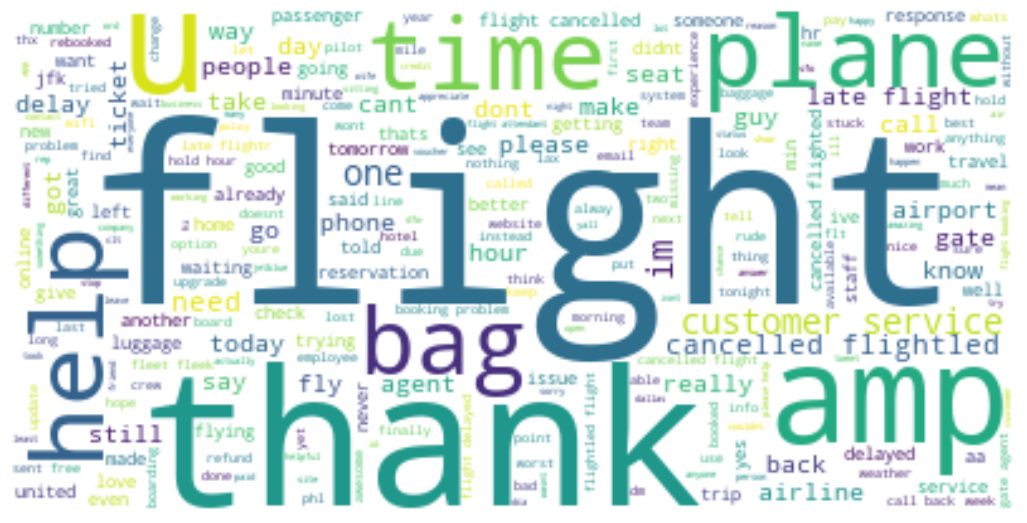

In [320]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<p style="background-color:#1DA1F2;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>